In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url1 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv"
url2 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv"

In [4]:
dem_candidates = pd.read_csv(url1,sep=',')
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rep_candidates = pd.read_csv(url2,sep=',',encoding = "latin-1")
rep_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
win_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "None")]
win_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * 239
lost_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Lost") & (dem_candidates["Primary Runoff Status"] == "None")]
lost_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * 564
dem_candidates_result = pd.concat([win_df, lost_df])
dem_original_with_results = dem_candidates_result.copy()
dem_candidates_result

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Final Election Result
5,Walt Maddox,AL,Governor of Alabama,Governor,Regular,6/5/18,Advanced,None,On the Ballot,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
11,Mallory Hagan,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
12,Lee Auman,AL,U.S. House Alabama District 4,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-62.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Sam Johnson,TX,U.S. House Texas District 3,Representative,Regular,3/6/18,Advanced,Lost,None,-20.709999,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Lost
734,Christine Mann,TX,U.S. House Texas District 31,Representative,Regular,3/6/18,Advanced,Lost,None,-17.379999,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Lost
742,Lillian Salerno,TX,U.S. House Texas District 32,Representative,Regular,3/6/18,Advanced,Lost,None,-4.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lost
754,Ruby Faye Woolridge,TX,U.S. House Texas District 6,Representative,Regular,3/6/18,Advanced,Lost,None,-16.030001,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Lost


In [7]:
#replicate the same process for rep_candidates
win_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "None")]
win_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * win_df.shape[0]
lost_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Lost") & (rep_candidates["Primary Runoff Status"] == "None")]
lost_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * lost_df.shape[0]
rep_candidates_result = pd.concat([win_df, lost_df])
rep_original_with_results = rep_candidates_result.copy()
rep_candidates_result

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,Final Election Result
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
8,Wendy Rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.40,...,NaN,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Won
10,Lea Marquez Peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.60,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Won
16,Nicolas Pierson,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Advanced,None,On the Ballot,51.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
17,Debbie Lesko,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,35.77,...,NaN,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Matt McCall,TX,U.S. House Texas District 21,Representative,Regular,3/6/18,Advanced,Lost,None,16.93,...,No,NaN,No,NaN,No,No,NaN,NaN,No,Lost
667,Bech Bruun,TX,U.S. House Texas District 27,Representative,Regular,3/6/18,Advanced,Lost,None,36.09,...,NaN,NaN,No,Yes,No,No,NaN,NaN,NaN,Lost
673,Carmen Maria Montiel,TX,U.S. House Texas District 29,Representative,Regular,3/6/18,Advanced,Lost,None,23.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lost
684,Bunni Pounds,TX,U.S. House Texas District 5,Representative,Regular,3/6/18,Advanced,Lost,None,21.95,...,Yes,Yes,Yes,Yes,NaN,Yes,NaN,NaN,NaN,Lost


In [8]:
cols = ['Race','Veteran?', 'LGBTQ?', 'STEM?','Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?','Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?','WFP Endorsed?', 'VoteVets Endorsed?','Final Election Result']


In [9]:
dem_candidates_result = dem_candidates_result[cols]
#dem_candidates_result = dem_candidates_result.fillna("No")
# dem_candidates_result = dem_candidates_result.replace({"Yes": 1, "No": 0})
#dem_candidates_result

In [10]:
endorsement = dem_candidates_result.iloc[: ,4:15].copy()
endorsement = endorsement.fillna("No")
endorsement

,Party Support?,Emily Endorsed?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?
5,No,No,No,No,No,No,No,No,No,No,No
7,No,No,No,No,No,No,No,No,No,No,No
9,No,No,No,No,No,No,No,No,No,No,No
11,No,No,No,No,No,No,No,No,No,No,No
12,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
733,No,No,No,No,No,No,No,No,No,No,No
734,No,No,No,No,No,Yes,No,No,No,No,No
742,No,Yes,No,No,No,No,No,No,No,No,No
754,No,No,No,No,No,No,No,No,No,No,No


In [11]:
endorsement_no_count = []
for i in range(11):
  endorsement_no_count.append(sum(endorsement.iloc[:,i] == "No"))
endorsement_no_count

[764, 749, 793, 798, 794, 718, 753, 788, 757, 773, 775]

In [12]:
endorsement_yes_count = []
for i in range(11):
  endorsement_yes_count.append(sum(endorsement.iloc[:,i] == "Yes"))
endorsement_yes_count

[39, 54, 10, 5, 9, 85, 50, 15, 46, 30, 28]

In [13]:

endorsement_percent_yes = []
for i in range(11):
  temp = endorsement_yes_count[i]
  endorsement_percent_yes.append(float(temp/803 * 100))
endorsement_percent_yes

[4.85678704856787,
 6.724782067247821,
 1.2453300124533,
 0.62266500622665,
 1.1207970112079702,
 10.585305105853053,
 6.226650062266501,
 1.86799501867995,
 5.72851805728518,
 3.7359900373599,
 3.4869240348692405]

In [14]:
endorse_col = endorsement.columns
endorse_percent_df = pd.DataFrame({
    "Type of Endorsement" : endorse_col,
    "Endorsement Yes Percent": np.round(endorsement_percent_yes,1)
})
endorse_percent_df = endorse_percent_df.sort_values("Endorsement Yes Percent")
endorse_percent_df

,Type of Endorsement,Endorsement Yes Percent
3,Warren Endorsed?,0.6
4,Sanders Endorsed?,1.1
2,Biden Endorsed?,1.2
7,PCCC Endorsed?,1.9
10,VoteVets Endorsed?,3.5
9,WFP Endorsed?,3.7
0,Party Support?,4.9
8,Indivisible Endorsed?,5.7
6,Justice Dems Endorsed?,6.2
1,Emily Endorsed?,6.7


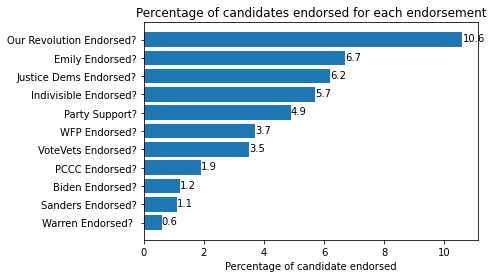

In [15]:
fig, ax = plt.subplots()
bars = ax.barh(y = endorse_percent_df['Type of Endorsement'], width = endorse_percent_df['Endorsement Yes Percent'])
for i, v in enumerate(endorse_percent_df['Endorsement Yes Percent']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of candidate endorsed")
plt.title("Percentage of candidates endorsed for each endorsement");

In [16]:
plot_2_df = dem_candidates_result[['Race', 'Veteran?', 'LGBTQ?', 'STEM?','Final Election Result']]
# drop rows with Null values for identities
plot_2_df = plot_2_df.dropna()
plot_2_df

,Race,Veteran?,LGBTQ?,STEM?,Final Election Result
5,White,No,No,No,Won
7,Nonwhite,Yes,No,No,Won
9,White,No,No,No,Won
11,White,No,No,No,Won
12,White,No,No,No,Won
...,...,...,...,...,...
733,White,No,No,No,Lost
734,White,No,No,Yes,Lost
742,White,No,No,No,Lost
754,Nonwhite,No,No,No,Lost


In [17]:
white_won = len(plot_2_df[(plot_2_df['Race']=='White')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='White'])
nonwhite_won = len(plot_2_df[(plot_2_df['Race']=='Nonwhite')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='Nonwhite'])
veteran_won = len(plot_2_df[(plot_2_df['Veteran?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='Yes'])
not_veteran_won =len(plot_2_df[(plot_2_df['Veteran?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='No'])
lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='Yes'])
not_lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='No'])
stem_won = len(plot_2_df[(plot_2_df['STEM?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='Yes'])
not_stem_won = len(plot_2_df[(plot_2_df['STEM?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='No'])

In [18]:
identity = np.array(['white', 'nonwhite', 'veteran', 'not_veteran', 'LGBTQ', 'not_LGBTQ', 'STEM', 'not_STEM'])
prop_won = np.array([white_won, nonwhite_won, veteran_won, not_veteran_won, lgbtq_won, not_lgbtq_won, stem_won, not_stem_won])
identity_percent_df = pd.DataFrame({
    "Identity Type" : identity,
    "Percent Won": np.round(prop_won*100,1)
})
identity_percent_df = identity_percent_df.sort_values("Percent Won")


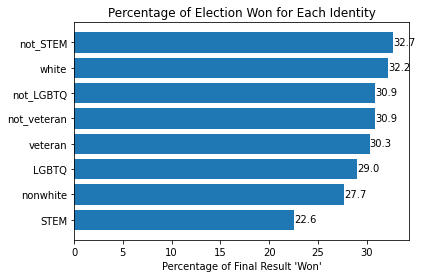

In [19]:
fig, ax = plt.subplots()
bars = ax.barh(y = identity_percent_df['Identity Type'], width = identity_percent_df['Percent Won'])
for i, v in enumerate(identity_percent_df['Percent Won']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of Final Result 'Won'")
plt.title("Percentage of Election Won for Each Identity");

In [20]:
race_result = plot_2_df[["Race", "Final Election Result"]]
race_result

,Race,Final Election Result
5,White,Won
7,Nonwhite,Won
9,White,Won
11,White,Won
12,White,Won
...,...,...
733,White,Lost
734,White,Lost
742,White,Lost
754,Nonwhite,Lost


In [21]:
result_by_categories = race_result.groupby(["Final Election Result","Race"]).size()
result_by_categories.to_frame()

0
Final Election Result Race         
Lost                  Nonwhite  146
                      White     306
Won                   Nonwhite   56
                      White     145

In [22]:
result_by_categories = race_result.pivot(values = ["Final Election Result","Race"], columns = "Race").count()
result_by_categories

                       Race    
Final Election Result  Nonwhite    202
                       White       451
Race                   Nonwhite    202
                       White       451
dtype: int64

## RQ2

In [23]:
disbursement = pd.read_csv("/content/drive/My Drive/data 102/candidate_summary_2018.csv")
disbursement

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.00,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.00,01/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,https://www.fec.gov/data/candidate/S8AL00340/?...,"MOORE, ROY JUDGE",S8AL00340,S,AL,0.0,REP,CHALLENGER,5147650.00,5059697.00,...,49480.00,0.0,10000.0,59480.00,0.00,5083692.00,4995739.00,0.00,0.00,04/01/2017
3789,https://www.fec.gov/data/candidate/H6OR04203/?...,"PERKINS, JO RAE",H6OR04203,H,OR,4.0,REP,CHALLENGER,14623.38,14464.30,...,0.00,0.0,0.0,0.00,144.10,8735.04,14225.20,21.90,0.00,01/01/2017
3790,https://www.fec.gov/data/candidate/H6NV01232/?...,"D'SILVA, REUBEN",H6NV01232,H,NV,1.0,DEM,CHALLENGER,90878.09,82884.55,...,682.85,0.0,0.0,682.85,552.01,89812.39,80898.68,956.20,552.01,01/01/2017
3791,https://www.fec.gov/data/candidate/H8PA18181/?...,"LAMB, CONOR",H8PA18181,H,PA,17.0,DEM,INCUMBENT,9145124.54,8898568.71,...,104688.54,0.0,5500.0,110188.54,44886.99,8768697.23,8718422.04,0.00,0.00,10/01/2017


Merge disbursement & rep_candidates, & dem_original_with_results. Columns shared are: Cand_name, candidate.

1. Lower case all name, replace the commas in Cand_name with space
2. match on similarity > 90, preserving all disbursement columns, Final Election Result
3.


In [24]:
dem_original_with_results['Candidate'] = dem_original_with_results['Candidate'].str.lower()
rep_candidates['Candidate'] = rep_candidates['Candidate'].str.lower()

In [25]:
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.lower()
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.replace(',', '')

In [26]:
out_disbursement = disbursement.copy()

In [27]:
disbursement.head(5)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ashby ken,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,eckhart don elijah,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,ziesing michael vincent,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,sires albio,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,smith douglas mark mr. jr.,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017


In [28]:
# My assumption: the first word is the last name, remaining part is first & middle name
last_name, first_middle_name = [], []
for lst in disbursement['Cand_Name'].str.split(" "): 
    last_name.append(lst[0])
    first_middle_name.append(lst[1:])

for name_ind in range(len(first_middle_name)):
    length = len(first_middle_name[name_ind])
    temp = ''
    for i in range(length - 1):
        temp = temp + first_middle_name[name_ind][i] + ' '
    temp = temp + first_middle_name[name_ind][length - 1]
first_middle_name[name_ind] = temp

In [29]:
res = []
for i in range(len(last_name)):
    res.append(' '.join(first_middle_name[i]) + ' '+ last_name[i])

The cell below will overwrite the previous two cell. By using only first + last name, it would reduce redundant matching from rapidfuzz

In [30]:
#UP TO DATE VERSION! feature engineering version: Do not consider middle name
last_name, first_name = [], []
for lst in disbursement['Cand_Name'].str.split(" "): 
    last_name.append(lst[0])
    first_name.append(lst[1])
res = []
for i in range(len(last_name)):
    res.append(first_name[i] + " " + last_name[i])

In [31]:
# Changed the order in Cand_name to be: first_middle_name + last_name
#candidates = list(zip(first_middle_name, last_name))
#res = []
#for ppl in candidates:
    #res.append(' '.join(ppl))
#res[0:5]

In [32]:
disbursement['Cand_Name'] = res

In [33]:
disbursement.head(10)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ken ashby,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,don eckhart,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,michael ziesing,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,albio sires,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,douglas smith,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.0,01/01/2017
5,https://www.fec.gov/data/candidate/H4CA42078/?...,boyd roberts,H4CA42078,H,CA,48.0,DEM,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
6,https://www.fec.gov/data/candidate/H8NJ07207/?...,lindsay brown,H8NJ07207,H,NJ,7.0,REP,CHALLENGER,4365.06,7357.50,...,0.00,0.0,0.0,0.00,0.00,4365.06,7357.50,0.00,0.0,02/18/2017
7,https://www.fec.gov/data/candidate/H8IL18092/?...,brian deters,H8IL18092,H,IL,18.0,DEM,CHALLENGER,20583.09,19770.32,...,100.00,0.0,0.0,100.00,0.00,20483.09,19670.32,0.00,0.0,09/03/2017
8,https://www.fec.gov/data/candidate/H8KS02173/?...,paul davis,H8KS02173,H,KS,2.0,DEM,OPEN,3985402.56,3954361.15,...,8147.53,0.0,0.0,8147.53,0.00,3538916.98,3926569.14,0.00,0.0,07/01/2017
9,https://www.fec.gov/data/candidate/H8MO02232/?...,john messmer,H8MO02232,H,MO,2.0,DEM,CHALLENGER,14657.22,14657.22,...,0.00,0.0,0.0,0.00,0.00,10258.00,14448.81,0.00,0.0,08/01/2017


In [34]:
dem_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "DEM"]
dem_disbursement = dem_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
dem_disbursement = dem_disbursement.reset_index().drop("index", axis = 1)
dem_disbursement.head()

,Cand_Name,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements
0,albio sires,460108.57,596546.56,0.0,0.0,98504.05
1,boyd roberts,0.00,0.00,0.0,0.0,0.00
2,brian deters,20583.09,19770.32,0.0,0.0,0.00
3,paul davis,3985402.56,3954361.15,0.0,0.0,0.00
4,john messmer,14657.22,14657.22,0.0,0.0,0.00


In [35]:
disbursement.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ken ashby,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,don eckhart,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,michael ziesing,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,albio sires,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,douglas smith,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017


In [36]:
pip install rapidfuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import rapidfuzz
from rapidfuzz import process, utils as fuzz_utils

In [38]:
def fuzzy_merge(baseFrame, compareFrame, baseKey, compareKey, threshold=86, limit=1, how='left'):
    s_mapping = {x: fuzz_utils.default_process(x) for x in compareFrame[compareKey]}

    m1 = baseFrame[baseKey].apply(lambda x: process.extract(
      fuzz_utils.default_process(x), s_mapping, limit=limit, score_cutoff=threshold, processor=None
    ))
    baseFrame['Match'] = m1

    m2 = baseFrame['Match'].apply(lambda x: ', '.join(i[2] for i in x))
    baseFrame['organisations'] = m2.replace("",np.nan)

    return baseFrame.merge(compareFrame, left_on='organisations', right_on=compareKey, how=how)

In [39]:
output_dem = fuzzy_merge(dem_original_with_results, dem_disbursement, 'Candidate', 'Cand_Name')
output_dem[['Candidate', 'Match', 'Cand_Name']].head(20)

,Candidate,Match,Cand_Name
0,walt maddox,[],NaN
1,robert kennedy jr.,"[(robert kennedy, 95.0, robert kennedy)]",robert kennedy
2,robert kennedy jr.,"[(robert kennedy, 95.0, robert kennedy)]",robert kennedy
3,tabitha isner,"[(tabitha isner, 100.0, tabitha isner)]",tabitha isner
4,mallory hagan,"[(mallory hagan, 100.0, mallory hagan)]",mallory hagan
5,lee auman,[],NaN
6,peter joffrion,"[(peter joffrion, 100.0, peter joffrion)]",peter joffrion
7,danner kline,"[(danner kline, 100.0, danner kline)]",danner kline
8,jared henderson,[],NaN
9,chintan desai,"[(chintan desai, 100.0, chintan desai)]",chintan desai


In [40]:
outliers_idx = output_dem[output_dem['Cand_Name'].isna()]['Candidate'].index
total = 0
columns = ['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement',
           'Fundraising_Disbursement', 'Other_Disbursements']
for outliers_idx in outliers_idx:
    name = output_dem[output_dem['Cand_Name'].isna()]['Candidate'][outliers_idx]
    lst = name.split(' ')
    temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]
    temp2 = temp[temp['Cand_Name'].str.contains(lst[0])]
    if temp2.shape[0] == 1:
        for column in columns:
            output_dem.at[outliers_idx, column] = temp2[column]

<ipython-input-40-3706b312f615>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]


In [41]:
#check cell: proportion of null values
output_dem['Cand_Name'].isna().sum() / output_dem.shape[0]

0.17326732673267325

In [42]:
rep_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "REP"]
rep_disbursement = rep_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
rep_disbursement = rep_disbursement.reset_index().drop("index", axis = 1)
rep_disbursement.head()

,Cand_Name,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements
0,don eckhart,0.00,0.00,0.0,0.0,0.00
1,lindsay brown,4365.06,7357.50,0.0,0.0,0.00
2,dominic rapini,198123.57,168307.75,0.0,0.0,0.00
3,alan cobb,150369.61,150369.61,0.0,0.0,3397.24
4,eric terrell,0.00,0.00,0.0,0.0,0.00


In [43]:
output_rep = fuzzy_merge(rep_candidates, rep_disbursement, 'Candidate', 'Cand_Name')
output_rep[['Candidate', 'Match', 'Cand_Name']].head(20)

,Candidate,Match,Cand_Name
0,mike dunleavy,[],NaN
1,michael sheldon,[],NaN
2,mead treadwell,[],NaN
3,darin colbry,[],NaN
4,thomas gordon,[],NaN
5,merica hlatcu,[],NaN
6,gerald heikes,[],NaN
7,steve smith,"[(steve smith, 100.0, steve smith)]",steve smith
8,wendy rogers,"[(wendy rogers, 100.0, wendy rogers)]",wendy rogers
9,tiffany shedd,"[(tiffany shedd, 100.0, tiffany shedd)]",tiffany shedd


In [44]:
outliers_idx = output_rep[output_rep['Cand_Name'].isna()].index
total = 0
columns = ['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement',
           'Fundraising_Disbursement', 'Other_Disbursements']
for outliers_idx in outliers_idx:
    name = output_rep[output_rep['Cand_Name'].isna()]['Candidate'][outliers_idx]
    lst = name.split(' ')
    temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]
    temp2 = temp[temp['Cand_Name'].str.contains(lst[0])]
    if temp2.shape[0] == 1:
        total += 1
        for column in columns:
            output_rep.at[outliers_idx, column] = temp2[column]
total

<ipython-input-44-7536ee324470>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]


60

In [45]:
output_rep['Cand_Name'].isna().sum() / output_rep.shape[0]

0.20152091254752852

In [46]:
print('Dem total samples: '+str((output_dem.shape[0]) - output_dem['Cand_Name'].isna().sum()))
print('Rep total samples: '+str((output_rep.shape[0]) - output_rep['Cand_Name'].isna().sum()))

Dem total samples: 668
Rep total samples: 630


In [47]:
output_dem = output_dem[~output_dem['Cand_Name'].isna()]
output_rep = output_rep[~output_rep['Cand_Name'].isna()]

In [48]:
lst = []
for i in range(output_dem.shape[0]):
  lst.append('dem')
output_dem['political_affiliation'] = lst

lst = []
for i in range(output_rep.shape[0]):
  lst.append('rep')
output_rep['political_affiliation'] = lst

<ipython-input-48-3ee90e42a13f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_dem['political_affiliation'] = lst
<ipython-input-48-3ee90e42a13f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_rep['political_affiliation'] = lst


In [49]:
#create final election result column with 1 as Win and 0 as lost
win_df1 = output_rep.loc[(output_rep["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "None")]
win_df2 = output_rep.loc[(output_rep["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ['Won'] * win_df.shape[0]
lost_df1 = output_rep.loc[(rep_candidates["Primary Status"] == "Lost") & (output_rep["Primary Runoff Status"] == "None")]
lost_df2 = output_rep.loc[(rep_candidates["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ['Lost'] * lost_df.shape[0]
output_rep = pd.concat([win_df, lost_df])
output_rep.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Match,organisations,Cand_Name,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,political_affiliation,Final Election Result
8,wendy rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.40,...,"[(wendy rogers, 100.0, wendy rogers)]",wendy rogers,wendy rogers,1423836.68,1427124.40,0.0,0.0,0.0,rep,Won
10,lea marquez peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.60,...,"[(peterson marquez, 95.0, peterson marquez)]",peterson marquez,peterson marquez,1466445.23,1457230.95,0.0,0.0,0.0,rep,Won
16,nicolas pierson,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Advanced,None,On the Ballot,51.40,...,[],NaN,"154 pierson joe nicolas Name: Cand_Name, dt...",77401.00,71640.50,0.0,0.0,0.0,rep,Won
17,debbie lesko,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,35.77,...,"[(debbie lesko, 100.0, debbie lesko)]",debbie lesko,debbie lesko,2103473.83,2032633.16,0.0,0.0,6002.8,rep,Won
30,steve ferrara,AZ,U.S. House Arizona District 9,Representative,Regular,8/28/18,Advanced,None,On the Ballot,58.90,...,"[(steve ferrara, 100.0, steve ferrara)]",steve ferrara,steve ferrara,1565927.76,1565927.76,0.0,0.0,0.0,rep,Won


In [50]:
col = ['Candidate', 'Total_Receipt', 'Total_Disbursement','Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement','Other_Disbursements',
       'State', 'Final Election Result', 'political_affiliation']

output_dem = output_dem[col]
output_rep = output_rep[col]

In [51]:
output_rep.columns == output_dem.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [52]:
match = pd.concat([output_dem, output_rep], ignore_index=True)

In [53]:
# paul davis appearing twice
match.head()

,Candidate,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,State,Final Election Result,political_affiliation
0,robert kennedy jr.,166845.21,166845.21,0.0,0.0,0.00,AL,Won,dem
1,robert kennedy jr.,37129.00,37129.00,0.0,0.0,0.00,AL,Won,dem
2,tabitha isner,524941.35,524941.35,0.0,0.0,5000.00,AL,Won,dem
3,mallory hagan,467514.71,464472.20,0.0,0.0,27000.00,AL,Won,dem
4,lee auman,70425.87,77551.69,0.0,0.0,1129.79,AL,Won,dem


In [54]:
median = np.median(match['Total_Disbursement'].values)
q3 = np.percentile(match['Total_Disbursement'].values, 75)
q1 = np.percentile(match['Total_Disbursement'].values, 25)
threshold = q3 + 1.5 * (q3 - q1)

In [55]:
outlier_match = match[match['Total_Disbursement'] > threshold]
outlier_match.head()

,Candidate,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,State,Final Election Result,political_affiliation
8,clarke tucker,2366991.03,2359234.62,0.0,0.0,0.00,AR,Won,dem
11,hiral tipirneni,4579945.10,4479343.36,0.0,0.0,311250.00,AZ,Won,dem
13,josh harder,8441529.09,8421288.43,0.0,0.0,701.62,CA,Won,dem
15,andrew janz,9233869.01,9211821.70,0.0,0.0,11120.00,CA,Won,dem
17,gil cisneros,12265194.02,12183755.20,0.0,0.0,226078.25,CA,Won,dem


In [56]:
no_outlier = match[match['Total_Disbursement'] < threshold]

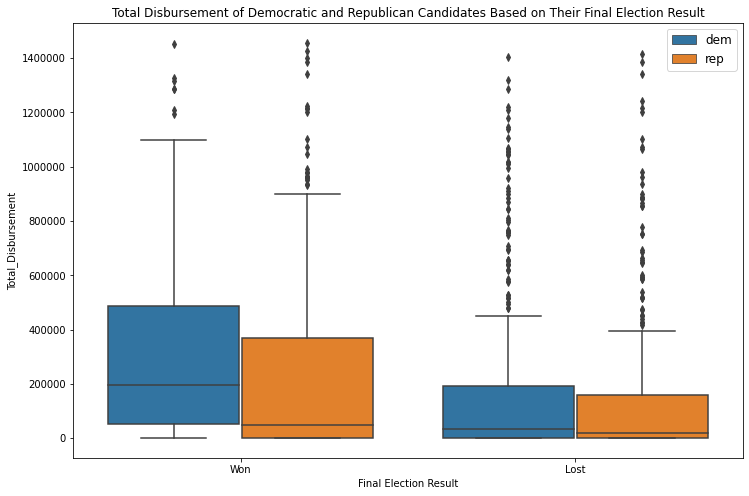

In [57]:
plt.figure(figsize=(12,8));
plt.ticklabel_format(style='plain');
sns.boxplot(data = no_outlier, x = 'Final Election Result', y = 'Total_Disbursement', hue = 'political_affiliation');
plt.legend(loc="upper right", frameon=True, fontsize=12);
plt.title('Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result');

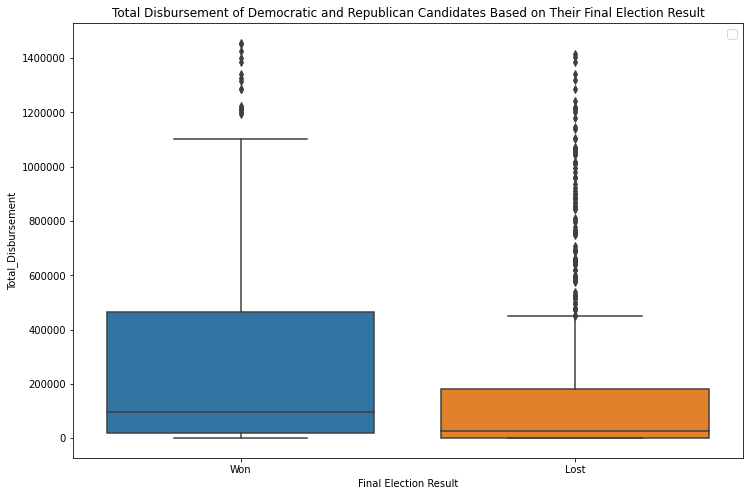

In [58]:
# Do not separate political affiliation
plt.figure(figsize=(12,8));
plt.ticklabel_format(style='plain');
sns.boxplot(data = no_outlier, x = 'Final Election Result', y = 'Total_Disbursement');
plt.legend(loc="upper right", frameon=True, fontsize=12);
plt.title('Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result');

In [59]:
match.columns

Index(['Candidate', 'Total_Receipt', 'Total_Disbursement',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Other_Disbursements', 'State', 'Final Election Result',
       'political_affiliation'],
      dtype='object')

In [60]:
no_outlier.head(5)

,Candidate,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,State,Final Election Result,political_affiliation
0,robert kennedy jr.,166845.21,166845.21,0.0,0.0,0.00,AL,Won,dem
1,robert kennedy jr.,37129.00,37129.00,0.0,0.0,0.00,AL,Won,dem
2,tabitha isner,524941.35,524941.35,0.0,0.0,5000.00,AL,Won,dem
3,mallory hagan,467514.71,464472.20,0.0,0.0,27000.00,AL,Won,dem
4,lee auman,70425.87,77551.69,0.0,0.0,1129.79,AL,Won,dem


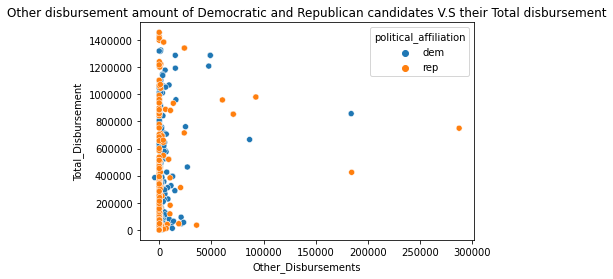

In [61]:
# Exempt_Legal_Accounting_Disbursement & Fundraising_Disbursement are all 0, if outliers included, there are a few nonzero values
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Other_Disbursements', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Other disbursement amount of Democratic and Republican candidates V.S their Total disbursement');

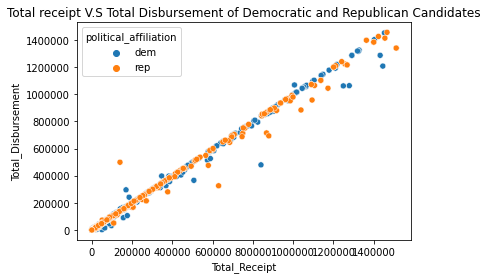

In [62]:
# Exempt_Legal_Accounting_Disbursement & Fundraising_Disbursement are all 0, if outliers included, there are a few nonzero values
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Total_Receipt', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Total receipt V.S Total Disbursement of Democratic and Republican Candidates');

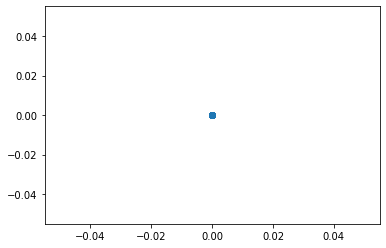

In [ ]:
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
plt.scatter(no_outlier['Fundraising_Disbursement'], no_outlier['Exempt_Legal_Accounting_Disbursement']);

In [ ]:
np.max(no_outlier['Fundraising_Disbursement'].values)

0.0

In [ ]:
no_outlier

,Candidate,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,State,Final Election Result,political_affiliation
0,brian deters,20583.09,19770.32,0.0,0.0,0.00,IL,Lost,dem
3,john messmer,14657.22,14657.22,0.0,0.0,0.00,MO,Lost,dem
4,ed andres,13370.00,13370.00,0.0,0.0,5607.21,MO,Lost,dem
6,darrel miller,0.00,0.00,0.0,0.0,0.00,IL,Lost,dem
7,richard dien winfield,0.00,0.00,0.0,0.0,0.00,GA,Lost,dem
...,...,...,...,...,...,...,...,...,...
1934,SK Alexander,1837746.56,1246402.35,0.0,0.0,0.00,TX,Lost,rep
1935,James Epley,107564.90,107496.61,0.0,0.0,0.00,SC,Lost,rep
1937,Marty Gearheart,119028.56,119029.56,0.0,0.0,10267.76,WV,Lost,rep
1938,Kerry Bentivolio,37273.54,34656.38,0.0,0.0,3933.62,MI,Lost,rep


In [ ]:
rep_original_with_results.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?',
       'Final Election Result'],
      dtype='object')

In [ ]:
list1 = disbursement["Cand_Name"].tolist()
list2 = dem_original_with_results["Candidate"].tolist()

In [ ]:
import difflib 
difflib.get_close_matches

<function difflib.get_close_matches(word, possibilities, n=3, cutoff=0.6)>

In [ ]:
#may take half a minute, default threshold in difflib.get_close_matches = 0.6
disbursement['match'] =disbursement["Cand_Name"].apply(lambda x: (difflib.get_close_matches(x, dem_original_with_results["Candidate"])[:1] or [None])[0])
disbursement.head()


,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date,match
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ken ashby,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN,kevin abel
1,https://www.fec.gov/data/candidate/S6OH00288/?...,don eckhart,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN,None
2,https://www.fec.gov/data/candidate/S8CA00499/?...,michael ziesing,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN,michael weiss
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,albio sires,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017,angel sides
4,https://www.fec.gov/data/candidate/H6MI03172/?...,douglas smith,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017,"doug ""new blue"" smith"


In [ ]:
# check accuracy
check = disbursement[disbursement["Cand_Party_Affiliation"] == "DEM"]
check[['Cand_Name', 'match']].head(20)

,Cand_Name,match
3,albio sires,angel sides
5,boyd roberts,john roberson
7,brian deters,brian deters
8,paul davis,paul davis
9,john messmer,john messmer
10,edward andres,ed andres
12,thomas carper,thomas cramer
14,darrel miller,darrel miller
15,richard rice,richard hart
17,m. shapiro,m.j. hegar


In [ ]:
#check proportion of null value with threshold 0.6, using difflib
check['match'].isna().sum()/ check.shape[0]

0.1413551401869159